In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# 1. Load the data
track_stats = pd.read_csv('data/tracks_by_time_and_streams.csv')

In [14]:
track_stats = track_stats.drop(columns='Unnamed: 0')

In [15]:
track_stats['minutes_streamed'] = track_stats['ms_played'] / 6000

track_stats

,master_metadata_track_name,master_metadata_album_artist_name,ms_played,stream_count,minutes_streamed
0,"""A New Game"" - Da Riffs Madden Mix",Sam Spence,19613,2,3.268833
1,"""Casta Diva"" from Norma",Bellini,2856,1,0.476000
2,"""I just want to make buscuits with papa"" (dial...",Irons In the Fire,19839,3,3.306500
3,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,149050,1,24.841667
4,"""Magnificent Eleven"" - Da Riffs Madden Mix",Sam Spence,59558,3,9.926333
...,...,...,...,...,...
27861,한 폭의 그림 Paradise,S.E.S.,355106,11,59.184333
27862,해변의 여인,COOL,3575,1,0.595833
27863,행복 (Happiness),Red Velvet,3094901,26,515.816833
27864,힐끔힐끔 Peep,ONE,358445,3,59.740833


In [16]:
# 3. Add average play time per stream


track_stats['avg_min_per_play'] = track_stats['minutes_streamed'] / track_stats['stream_count']

# 4. Create a ratio metric (high play time to play count ratio indicates potential outliers)
track_stats['play_time_to_count_ratio'] = track_stats['minutes_streamed'] / track_stats['stream_count']


In [17]:
# 5. Calculate z-scores for our metrics of interest
track_stats['minutes_played_zscore'] = np.abs((track_stats['minutes_streamed'] - track_stats['minutes_streamed'].mean()) / track_stats['minutes_streamed'].std())
track_stats['streams_zscore'] = np.abs((track_stats['stream_count'] - track_stats['stream_count'].mean()) / track_stats['stream_count'].std())
track_stats['ratio_zscore'] = np.abs((track_stats['play_time_to_count_ratio'] - track_stats['play_time_to_count_ratio'].mean())
                                     / track_stats['play_time_to_count_ratio'].std())

In [22]:
# 6. Find outliers based on specific criteria
outliers = track_stats[(track_stats['minutes_played_zscore'] > 2) & (track_stats['streams_zscore'] < 0.5)]

In [23]:
# Alternative: IQR method
Q1_ms = track_stats['minutes_streamed'].quantile(0.25)
Q3_ms = track_stats['minutes_streamed'].quantile(0.75)
IQR_ms = Q3_ms - Q1_ms

Q1_ts = track_stats['stream_count'].quantile(0.25)
Q3_ts = track_stats['stream_count'].quantile(0.75)
IQR_ts = Q3_ts - Q1_ts

outliers_iqr = track_stats[(track_stats['minutes_streamed'] > (Q3_ms + 1.5 * IQR_ms)) & 
                          (track_stats['stream_count'] < (Q1_ts))]

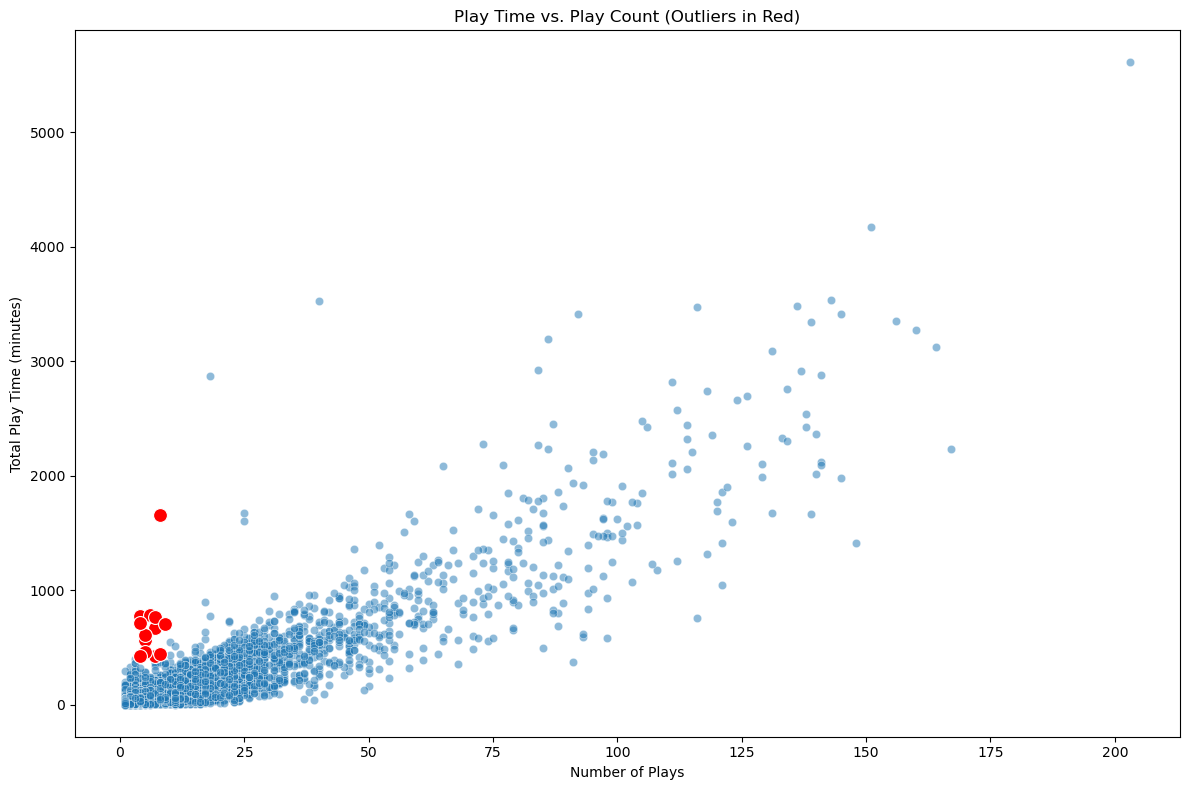

In [28]:
# 7. Visualize the relationship to identify outliers
plt.figure(figsize=(12, 8))
sns.scatterplot(data=track_stats, x='stream_count', y='minutes_streamed', alpha=0.5)
sns.scatterplot(data=outliers, x='stream_count', y='minutes_streamed', color='red', s=100)
plt.title('Play Time vs. Play Count (Outliers in Red)')
plt.xlabel('Number of Plays')
plt.ylabel('Total Play Time (minutes)')
plt.xscale('linear')  # Often helpful to use log scale for this type of data
plt.yscale('linear')
plt.tight_layout()
plt.show()


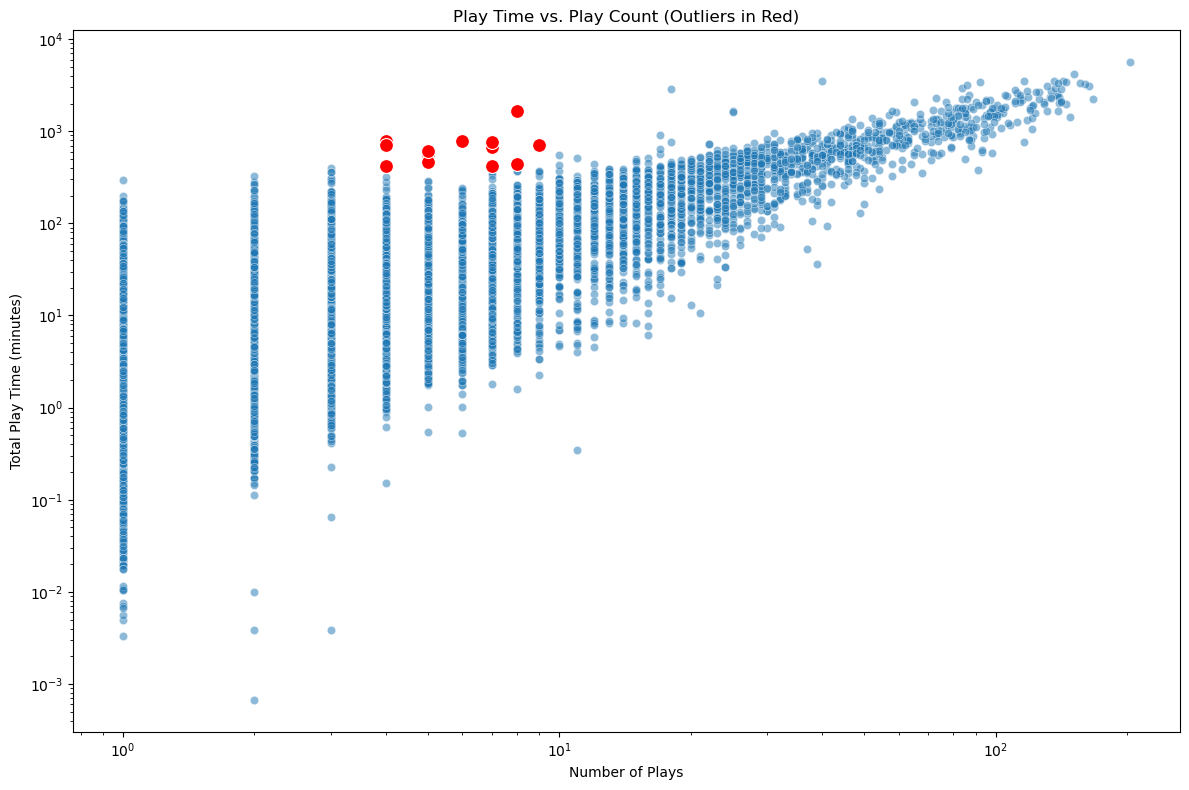

In [27]:
# 7. Visualize the relationship to identify outliers
plt.figure(figsize=(12, 8))
sns.scatterplot(data=track_stats, x='stream_count', y='minutes_streamed', alpha=0.5)
sns.scatterplot(data=outliers, x='stream_count', y='minutes_streamed', color='red', s=100)
plt.title('Play Time vs. Play Count (Outliers in Red)')
plt.xlabel('Number of Plays')
plt.ylabel('Total Play Time (minutes)')
plt.xscale('log')  # Often helpful to use log scale for this type of data
plt.yscale('log')
plt.tight_layout()
plt.show()


In [29]:
# 8. Display the top outliers
outliers.sort_values('play_time_to_count_ratio', ascending=False).head(20)

,master_metadata_track_name,master_metadata_album_artist_name,ms_played,stream_count,minutes_streamed,avg_min_per_play,play_time_to_count_ratio,ms_played_zscore,ts_zscore,ratio_zscore
1795,Australia - Traditional Didgeridoo Australian ...,Didgeridoo Aboriginal Dreamtime,9952979,8,1658.829833,207.353729,207.353729,8.937235,0.385394,15.034262
5888,Didgeridoo Aboriginal Music with Babbling Broo...,Didgeridoo Aboriginal Dreamtime,4655085,4,775.847500,193.961875,193.961875,4.040902,0.000263,14.019696
22227,"Symphony No. 3 in A Minor, Op. 44: I. Lento - ...",Sergei Rachmaninoff,4259732,4,709.955333,177.488833,177.488833,3.675515,0.000263,12.771699
17601,"Piano Concerto No. 3 in D Minor, Op. 30: I. Al...",Sergei Rachmaninoff,4694563,6,782.427167,130.404528,130.404528,4.077387,0.192566,9.204594
22217,"Symphony No. 1 in D Minor, Op. 13: IV. Allegro...",Sergei Rachmaninoff,3672111,5,612.018500,122.403700,122.403700,3.132433,0.096151,8.598451
18441,"Rachmaninov: Symphony No. 3 in A Minor, Op. 44...",Sergei Rachmaninoff,3405871,5,567.645167,113.529033,113.529033,2.886373,0.096151,7.926107
22223,"Symphony No. 2 in E Minor, Op. 27: III. Adagio",Sergei Rachmaninoff,4568223,7,761.370500,108.767214,108.767214,3.960623,0.288980,7.565352
22216,"Symphony No. 1 in D Minor, Op. 13: III. Larghetto",Sergei Rachmaninoff,2543668,4,423.944667,105.986167,105.986167,2.089522,0.000263,7.354660
4932,"Concerto for Flute, Harp, and Orchestra in C, ...",Wolfgang Amadeus Mozart,3997000,7,666.166667,95.166667,95.166667,3.432697,0.288980,6.534975
22212,"Symphony No. 1 in C Major, Op. 21: I. Adagio m...",Ludwig van Beethoven,2780000,5,463.333333,92.666667,92.666667,2.307941,0.096151,6.345575
